1. Gerekli k√ºt√ºphaneler

In [1]:
# üóÉÔ∏è Veri okuma ve i≈üleme
import pandas as pd  # Veri okuma, d√ºzenleme ve DataFrame yapƒ±larƒ± olu≈üturmak i√ßin
import numpy as np  # Sayƒ±sal hesaplamalar ve veri manip√ºlasyonlarƒ± yapmak i√ßin

# üìà Grafiksel g√∂rselle≈ütirme ve analiz
import matplotlib.pyplot as plt  # Grafik ve g√∂rselle≈ütirme olu≈üturmak i√ßin (√∂rneƒüin ROC eƒürisi, doƒüruluk grafikleri)
import seaborn as sns  # Estetik ve geli≈ümi≈ü grafik t√ºrleri olu≈üturmak i√ßin (√∂rneƒüin ƒ±sƒ± haritasƒ±)

# ‚öôÔ∏è Veri √∂n i≈üleme ve d√∂n√º≈üt√ºrme
from sklearn.preprocessing import LabelEncoder  # Kategorik verileri sayƒ±sal verilere d√∂n√º≈üt√ºrmek i√ßin (label encoding)
from sklearn.preprocessing import StandardScaler  # √ñzelliklerin √∂l√ßeklendirilmesi (standartla≈ütƒ±rƒ±lmasƒ±) i√ßin

# üìä Model performans deƒüerlendirmesi ve doƒürulama metrikleri
from sklearn.metrics import classification_report  # Precision, Recall, F1-score gibi performans metriklerini elde etmek i√ßin
from sklearn.metrics import confusion_matrix  # Ger√ßek ve tahmin deƒüerlerini kar≈üƒ±la≈ütƒ±rmak i√ßin karma≈üƒ±klƒ±k matrisi olu≈üturma
from sklearn.metrics import roc_auc_score  # ROC eƒürisi altƒ±nda kalan alanƒ± (AUC) hesaplamak i√ßin
from sklearn.metrics import roc_curve  # ROC eƒürisi verilerini hesaplamak i√ßin (TPR ve FPR)
from sklearn.metrics import precision_recall_curve  # Hassasiyet-doƒüruluk eƒürisini olu≈üturmak i√ßin
from sklearn.metrics import f1_score  # F1 skorunu hesaplamak i√ßin

# ü§ñ Keras ve Scikit-learn entegrasyonu
from scikeras.wrappers import KerasClassifier  # Keras modellerini scikit-learn ile uyumlu hale getirmek i√ßin (model sarmalayƒ±cƒ±)

# üïµÔ∏è‚Äç‚ôÇÔ∏è Model a√ßƒ±klanabilirliƒüi ve √∂zellik √∂nem sƒ±ralamasƒ±
from sklearn.inspection import permutation_importance  # √ñzelliklerin model tahminine etkisini √∂l√ßmek i√ßin (perm√ºtasyon √∂nemi)

# ‚öñÔ∏è Aƒüƒ±rlƒ±klƒ± sƒ±nƒ±f dengesi
from sklearn.utils.class_weight import compute_class_weight  # Dengesiz sƒ±nƒ±flar i√ßin aƒüƒ±rlƒ±k hesaplama

# ü§ñ Yapay Sinir Aƒüƒ± (YSA) olu≈üturma
from tensorflow.keras.models import Sequential  # Yapay sinir aƒüƒ± modelini sƒ±ralƒ± olarak olu≈üturmak i√ßin
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, ELU, ReLU, LeakyReLU  # Aƒü katmanlarƒ±nƒ± ve aktivasyon fonksiyonlarƒ±nƒ± olu≈üturmak i√ßin

# üß† Model optimizasyonu ve √∂ƒürenme
from tensorflow.keras.optimizers import AdamW, Adam  # Optimizasyon algoritmalarƒ± (aƒüƒ±rlƒ±k g√ºncelleme) i√ßin
from tensorflow.keras.callbacks import EarlyStopping  # Modeli erken durdurmak i√ßin (a≈üƒ±rƒ± √∂ƒürenmeyi √∂nleme)
from tensorflow.keras.callbacks import ReduceLROnPlateau  # √ñƒürenme oranƒ±nƒ± dinamik olarak azaltmak i√ßin
from tensorflow.keras.losses import BinaryCrossentropy  # ƒ∞kili sƒ±nƒ±flandƒ±rma kayƒ±p fonksiyonunu kullanmak i√ßin

# üßÆ Sƒ±nƒ±f daƒüƒ±lƒ±mƒ± ve dengesizlik analizi
from collections import Counter  # Verideki sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± analiz etmek i√ßin

# ‚öñÔ∏è Sƒ±nƒ±f dengesizlik sorununu √ß√∂zmek i√ßin SMOTE y√∂ntemi
from imblearn.over_sampling import SMOTE  # Azƒ±nlƒ±k sƒ±nƒ±fƒ±nƒ± √ßoƒüaltarak sƒ±nƒ±f dengesizliƒüini gidermek i√ßin

# üíæ Model ve encoder kaydetme/y√ºkleme i≈ülemleri
import joblib  # Model ve diƒüer nesneleri dosya olarak kaydetmek/y√ºklemek i√ßin

2. Veriyi okuma

In [2]:
# Verileri oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# √ñzellik ve hedef ayƒ±r
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("‚úÖ Eƒüitim verisi:", X_train.shape)
print("‚úÖ Test verisi:", X_test.shape)
print("üéØ Sƒ±nƒ±f daƒüƒ±lƒ±mƒ± (y_train):\n", y_train.value_counts())

‚úÖ Eƒüitim verisi: (1007, 23)
‚úÖ Test verisi: (252, 23)
üéØ Sƒ±nƒ±f daƒüƒ±lƒ±mƒ± (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


3. SMOTE ile veri dengeleme

In [3]:
# üéØ Orijinal sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
print("üéØ Orijinal sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# üéØ Dengelenmi≈ü sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± kontrol etme
print("‚öñÔ∏è Dengelenmi≈ü eƒüitim sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:", Counter(y_train_balanced))

üéØ Orijinal sƒ±nƒ±f daƒüƒ±lƒ±mƒ±: Counter({0: 528, 1: 479})
‚öñÔ∏è Dengelenmi≈ü eƒüitim sƒ±nƒ±f daƒüƒ±lƒ±mƒ±: Counter({0: 528, 1: 528})


4. Model Tanƒ±mƒ±

In [4]:
def build_ann_model():
    model = Sequential([
        Input(shape=(X_train_balanced.shape[1],)),

        # # 1. Katman
        Dense(256),
        ELU(),  
        BatchNormalization(),
        Dropout(0.4),

        # 2. Katman
        Dense(128),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.3),

        # 3. Katman
        Dense(64),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),

        # 3. Katman
        Dense(32),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        # 4. Katman
        Dense(16),
        ReLU(),
        Dropout(0.1),

        # √áƒ±kƒ±≈ü Katmanƒ±
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss=BinaryCrossentropy(),
        optimizer=AdamW(learning_rate=0.005, weight_decay=0.0001),
        metrics=['accuracy']
    )
    return model

model = build_ann_model()

model.summary()

2025-05-12 16:49:13.131135: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-12 16:49:13.131169: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-12 16:49:13.131172: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-12 16:49:13.131189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-12 16:49:13.131202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 256)            ‚îÇ         6,144 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ elu (ELU)                       ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 256)            ‚îÇ         1,024 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu (LeakyReLU)         ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ leaky_re_lu_1 (LeakyReLU)       ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 64)             ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                       

 Total params: 51,841 (202.50 KB)

 Trainable params: 50,881 (198.75 KB)

 Non-trainable params: 960 (3.75 KB)

5. Model eƒüitimi

In [5]:
# üåü Eƒüitim verisini DataFrame'e d√∂n√º≈üt√ºrme
X_train_scaled = pd.DataFrame(X_train_balanced, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X_test.columns)

# Early stopping ve √∂ƒürenme oranƒ± azaltma
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=1e-6)

# Sƒ±nƒ±f aƒüƒ±rlƒ±klarƒ± (Dengeli)
class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)))

# üåü Model eƒüitimi
model = build_ann_model()
history = model.fit(
    X_train_scaled,
    y_train_balanced,
    class_weight=class_weights,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stop, reduce_lr]  
)

print("‚úÖ Model ba≈üarƒ±yla eƒüitildi.")

# üåü Eƒüitimli modeli kaydetme
model.save("ann_model.h5")
print("‚úÖ Model ba≈üarƒ±yla kaydedildi.")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-05-12 16:49:14.274217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


‚úÖ Model ba≈üarƒ±yla eƒüitildi.
‚úÖ Model ba≈üarƒ±yla kaydedildi.


6. Tahmin

In [6]:
def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # Youden's J ƒ∞statistiƒüi ile en iyi threshold
    j_scores = tpr - fpr
    optimal_threshold_j = thresholds_roc[np.argmax(j_scores)]
    print(f"üîç En iyi threshold (Youden's J): {optimal_threshold_j:.4f}")

    # F1 skoru ile en iyi threshold
    f1_scores = [f1_score(y_true, (y_prob >= t).astype(int)) for t in thresholds_pr]
    optimal_threshold_f1 = thresholds_pr[np.argmax(f1_scores)]
    print(f"üîç En iyi threshold (F1 skoru): {optimal_threshold_f1:.4f}")

    return optimal_threshold_j, optimal_threshold_f1

# Modelden olasƒ±lƒ±k tahminleri al
y_prob = model.predict(X_test).flatten()

# En iyi threshold deƒüerini bul
optimal_threshold_j, optimal_threshold_f1 = find_optimal_threshold(y_test, y_prob)

# Deploy i√ßin en uygun threshold
optimal_threshold = optimal_threshold_f1
print(f"üåü Model i√ßin belirlenen optimal threshold: {optimal_threshold:.4f}")

# üåü Threshold'u dosyaya kaydetme
try:
    with open("optimal_threshold.txt", "w") as f:
        f.write(str(optimal_threshold))
    print("‚úÖ Optimal threshold ba≈üarƒ±yla kaydedildi.")
except Exception as e:
    print(f"‚ùå Threshold kaydedilemedi: {str(e)}")

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step
üîç En iyi threshold (Youden's J): 0.5873
üîç En iyi threshold (F1 skoru): 0.5873
üåü Model i√ßin belirlenen optimal threshold: 0.5873
‚úÖ Optimal threshold ba≈üarƒ±yla kaydedildi.


7. Deƒüerlendirme

üìã Sƒ±nƒ±flandƒ±rma Raporu (ANN):

              precision    recall  f1-score   support

           0      0.903     0.917     0.910       132
           1      0.907     0.892     0.899       120

    accuracy                          0.905       252
   macro avg      0.905     0.904     0.904       252
weighted avg      0.905     0.905     0.905       252



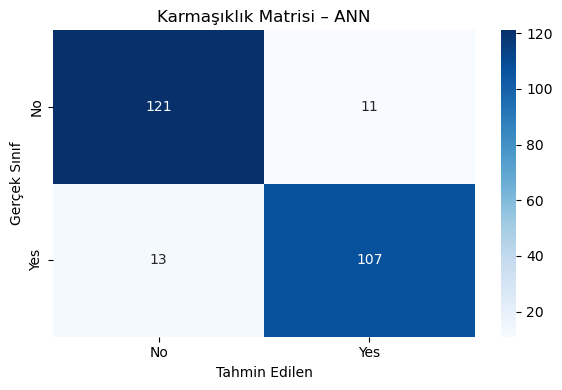

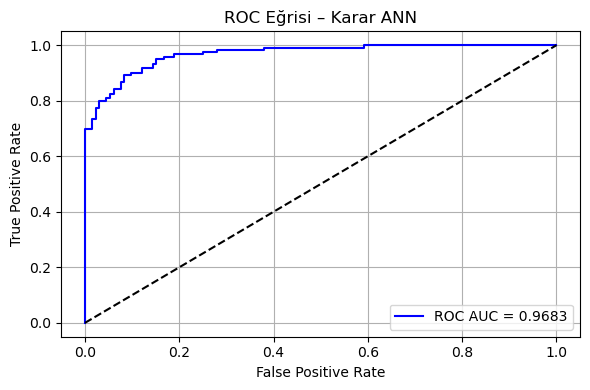

In [7]:
# üåü Optimal threshold ile sƒ±nƒ±f tahmini
y_pred = (y_prob >= optimal_threshold).astype("int32")

# üìã Sƒ±nƒ±flandƒ±rma raporu
print("üìã Sƒ±nƒ±flandƒ±rma Raporu (ANN):\n")
report = classification_report(y_test, y_pred, digits=3)  # 3 basamak hassasiyeti
print(report)

# üîç Karma≈üƒ±klƒ±k Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karma≈üƒ±klƒ±k Matrisi ‚Äì ANN")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Ger√ßek Sƒ±nƒ±f")
plt.tight_layout()
plt.show()

# üåà ROC Eƒürisi
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eƒürisi ‚Äì Karar ANN")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

8. Deployment

In [8]:
# üì¶ Modeli kaydet (sadece ANN modeli)
model.save("../saved_model/mental_ann_model_final.keras")
joblib.dump(model, "../saved_model/mental_ann_model_final.pkl")

print("üíæ Model ve scaler ba≈üarƒ±yla kaydedildi:")
print("- mental_ann_model_final.keras")
print("- mental_ann_model_final.pkl")

üíæ Model ve scaler ba≈üarƒ±yla kaydedildi:
- mental_ann_model_final.keras
- mental_ann_model_final.pkl


9. √ñzellik √ñnemi

‚úÖ Eƒüitimli aƒüƒ±rlƒ±klar y√ºklendi.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


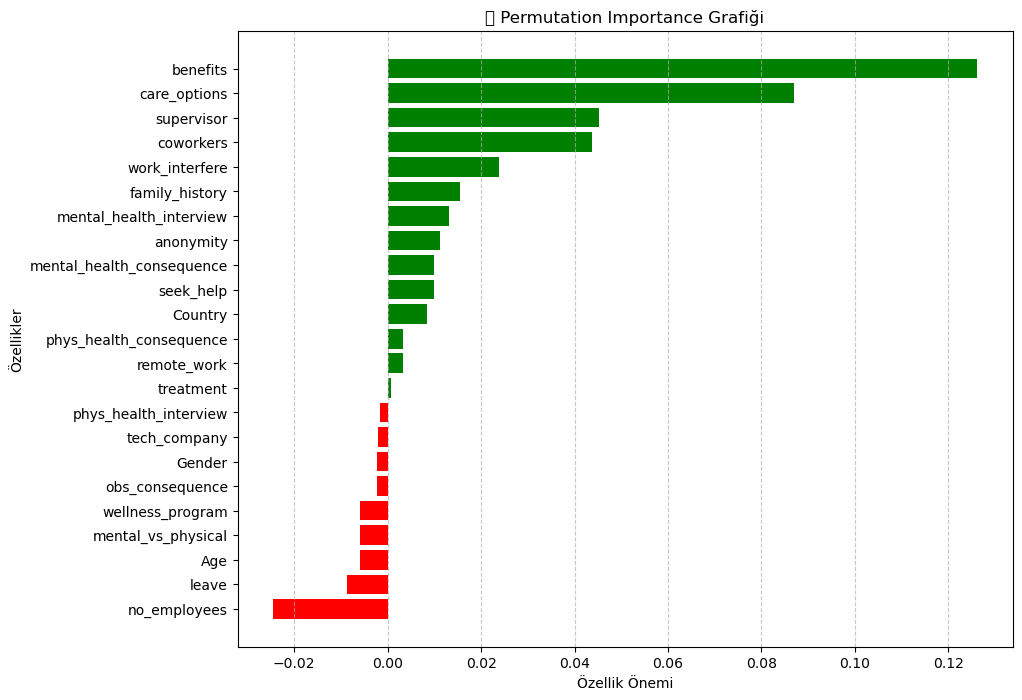

In [9]:
# üåü Sklearn uyumlu hale getirme
model_sklearn = KerasClassifier(
    model=build_ann_model,
    epochs=30,
    batch_size=16,
    verbose=0
)

# üåü Modeli y√ºklemek i√ßin yeniden olu≈üturma
model_sklearn.model = build_ann_model()
model_sklearn.model.load_weights("ann_model.h5")
print("‚úÖ Eƒüitimli aƒüƒ±rlƒ±klar y√ºklendi.")

# üåü Sklearn uyumlu hale getirme
model_sklearn.fit(X_train_scaled, y_train_balanced)

# üîç Permutation Importance hesaplama
result = permutation_importance(model_sklearn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# üóÉÔ∏è Sonu√ßlarƒ± DataFrame olarak saklama
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})

# üìä Perm√ºtasyon √∂nemini sƒ±ralama
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# üåà Grafik olu≈üturma
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in importance_df['Importance']]
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('√ñzellik √ñnemi')
plt.ylabel('√ñzellikler')
plt.title('üîç Permutation Importance Grafiƒüi')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()